<a href="https://colab.research.google.com/github/Tahan402/DailyPractice/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## **Linear Regression**

use linear regression when we have x var is continuos/numeric & y var is also numeric.

is there are categorical variable as X ,use one hot enconding

Read the data
importing data from hard to google colab

In [2]:
from google.colab import files
data_to_load=files.upload()

Saving Advertising.csv to Advertising.csv


In [4]:
import io
adv_data = pd.read_csv(io.BytesIO(data_to_load['Advertising.csv']))

Checking The data 

In [5]:
adv_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


NOTE: All the values in the above data are in thousands ('000s)

Features/Variables:
*   TV
*   Radio
*   Newspaper
*   Sales

TV, Radio and Newspaper are "Input" Vars / Features
Sales is the "Output" var


Checking the number of Rows and column

In [6]:
adv_data.shape

(200, 5)

There are 200 rows and 5 columns in the data set (including the index column - having "0" as the header)

Each row represents a particular town/city (in general a particular market)

In [7]:
adv_data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4



Everyone

# Visualize the relationship between features (input vars) and the target (output var)

Use Scatterplots


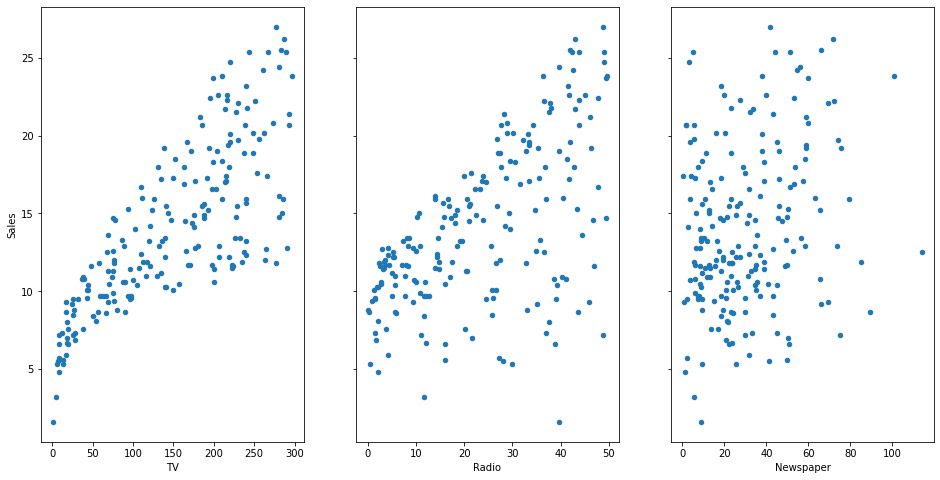

In [8]:
fig, axs = plt.subplots(1, 3 , sharey= True)
adv_data.plot(kind = 'scatter', x= 'TV' , y= 'Sales', ax = axs[0], figsize= (16,8) )
adv_data.plot(kind = 'scatter', x='Radio', y='Sales', ax= axs[1])
adv_data.plot(kind = 'scatter', x='Newspaper', y='Sales', ax=axs[2])



Everyone

Questions that we can answer using Linear Regression
*   Is there a relationship between advertising amount (x variable/s) and sales (y var)
*   Strength of relationship - How much variation in sales can be explained by advertisement amount
*   Which type of advertisment channel contributes for increase/decrease in sales
*   Effect of each ad type on sales
*   Can we predict sales for a given amount spent on advertisments



Let us use "TV" ad spends to check the effect on sales


Create/Build the model in one line of code

In [9]:
lm = smf.ols(formula = 'Sales ~ TV',data=adv_data ).fit()

Getting the model Coefficient 

In [10]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Manually doing predictions - E.g. Amount spent on TV ads is 50,000 dollars. What can be the expected sales?

Note: We need to enter only "50" and NOT "50,000" as the data we have used represents '000s


In [11]:
7.032594+0.047537*50

9.409444

Using statsmodels to make predictions


*   Here we have to create a dataframe (df) because statsmodels formula interface expects a df


In [12]:
x_new = pd.DataFrame({"TV":[50]})
x_new.head()

,TV
0,50


In [13]:
lm.predict(x_new)

0    9.409426
dtype: float64

Computing the P value


In [14]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

We can get the confidence interval(CI) for the model coefficients 

In [15]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Findind R Square

In [16]:
lm.rsquared

0.611875050850071

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        02:39:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Everyone

#Plot the (least squares) line
*   Select the smallest and largest values in the x variable (TV adv spend) and then make predictions
*   Use the predicted values and plot the least squares line



Create a dataframe (df) with min & max value of "x" i.e. min & max of TV adv spend


In [18]:
x_new = pd.DataFrame({'TV': [adv_data.TV.min(), adv_data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


Make predictions for the min & max value stored in the new df x_new and save/store them


In [20]:
preds=lm.predict(x_new)
preds

0     7.065869
1    21.122454
dtype: float64

Let us first plot the observed data (the data given in the data set), then plot the least squares line


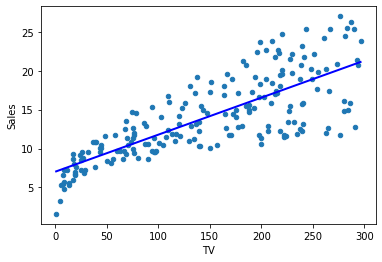

In [24]:
adv_data.plot(kind = 'scatter',x='TV',y='Sales')
plt.plot(x_new,preds, c='blue',linewidth = 2 )
plt.show()

# Multiple Linear Regression

Fitting the model with all the three "x" variables


In [25]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper' , data = adv_data).fit()



Printing the coefficients


In [26]:
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [27]:
lm.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        03:27:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We notice that newspaper (advertisments) is not significantly influencing sales

Therefore, we can keep only those variables which are significantly impacting sales in our model

Let us build the model with only TV and Radio as the input variables or features


In [29]:
lm = smf.ols(formula='Sales ~ TV + Radio ' , data = adv_data).fit()



In [30]:
lm.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           4.83e-98
Time:                        03:34:12   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0